In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=it---------it-tso-0001entrytransmissionat---------,it---------it-tso-0001exitstorage,it---------it-tso-0001exittransmission,it---------it-tso-0001exittransmissionch---------,it---------it-tso-0001entrylng%20terminals,it---------it-tso-0001entrytransmission,it---------it-tso-0001entrytransmissionch---------,it---------it-tso-0001exitfinal%20consumers,it---------it-tso-0001exitdistribution,it---------it-tso-0001entrystorage,it---------it-tso-0001exittransmissionsi---------,it---------it-tso-0001entryproduction,it---------it-tso-0001exittransmissionat---------,it---------it-tso-0001entrytransmissionsi---------,it---------it-tso-0004entrylng%20terminals&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesITIT---------IT-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesITIT---------IT-TSO-0001entryProduc...        1   Aggregates   
2    1AggregatesITIT---------IT-TSO-0001entryStorag...        1   Aggregates   
3    1AggregatesITIT---------IT-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesITIT---------IT-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
429  1AggregatesITIT---------IT-TSO-0001exitStorage...        1   Aggregates   
430  1AggregatesITIT---------IT-TSO-0001exitTransmi...        1   Aggregates   
431  1AggregatesITIT---------IT-TSO-0001exitTransmi...        1   Aggregates   
432  1AggregatesITIT---------IT-TSO-0001exitTransmi...        1   Aggregates   
433  1AggregatesITIT---------IT-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day       value
0          entry    2   415220214
1          entry    2    89848742
2          entry    2   619995080
3          entry    2  1011532399
4          entry    2   868106529
..           ...  ...         ...
429         exit    1           0
430         exit    1    49868702
431         exit    1           0
432         exit    1     4710065
433         exit    1           0

[434 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         3.449490e+08
    exit          3.425845e+08
2   entry         4.619465e+08
    exit          6.393561e+08
3   entry         4.516100e+08
...                        ...
29  exit          7.335537e+08
30  entry         3.631343e+08
    exit          4.718289e+08
31  entry         3.451769e+08
    exit          4.638282e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

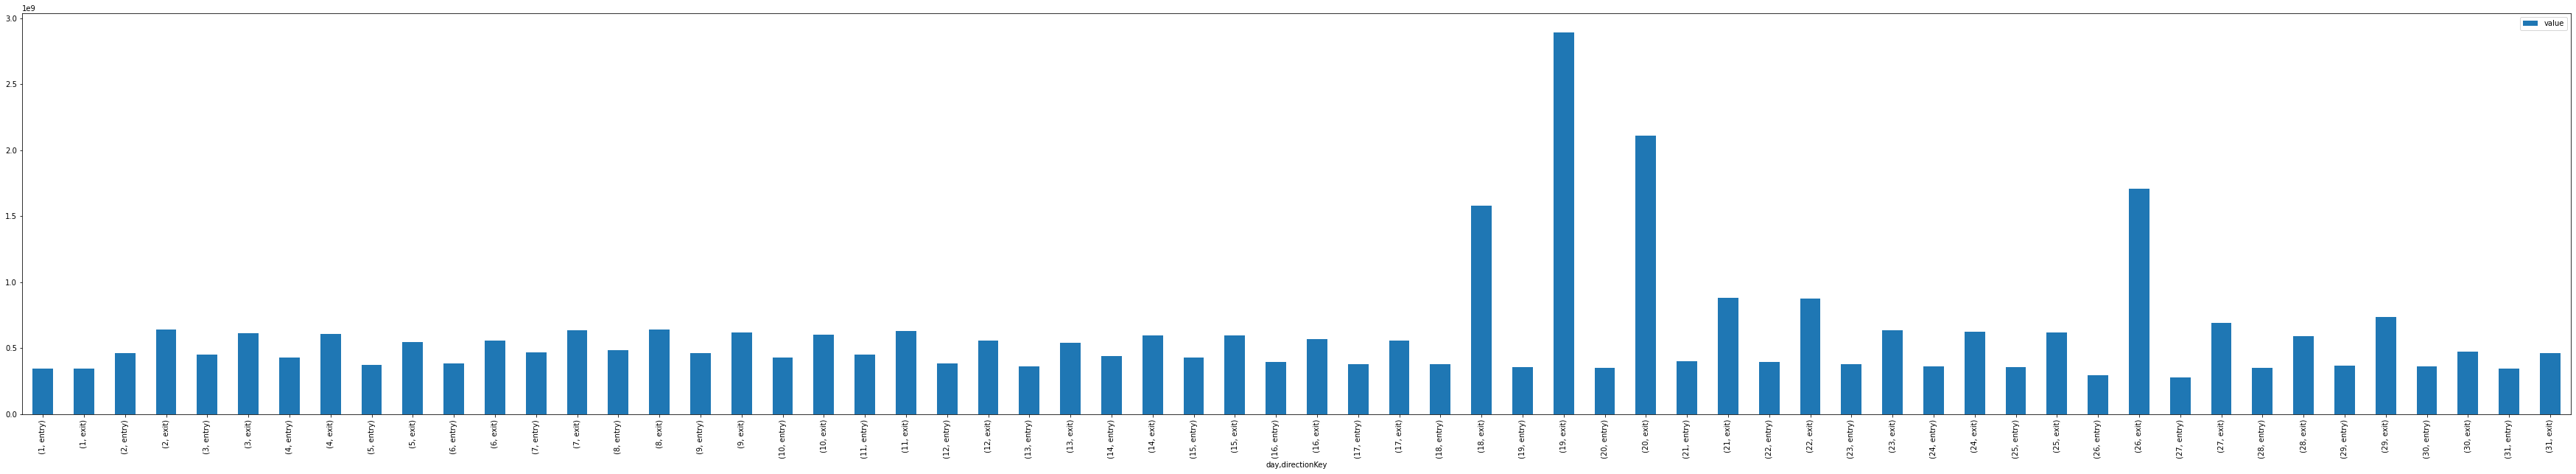

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))